# Graphical Method - Two Variable
*By Saideva Sathvik, I MSc. DataScience And Computing, SSSIHL*


**The Reddy Mikks Problem**

Maximize $f(X) = 5x1+4x2$
subject to 
$$6x1+4x2\le 24\\
x1+2x2\le6\\
-x1+x2\le1\\
x2\le2\\
x1\ge0\\
x2\ge0\\
$$ 

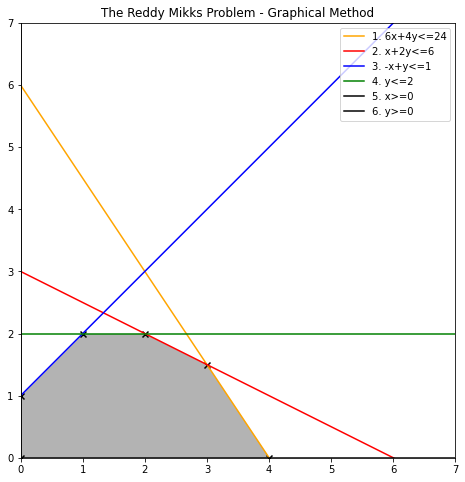

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 5*x[0]+4*x[1]

def c1(x):
    return (24-6*x)/4
    
def c2(x):
    return (6-x)/2
    
def c3(x):
    return 1+x

def c4(x):
    return 2+x-x

def c5(x):
    return 0+x-x


a = np.linspace(0,7,1000)

d = np.linspace(-1,7,1000)

x,y = np.meshgrid(d,d)

fig = plt.figure(figsize=(10,8))
plt.plot(a,c1(a),c='orange',label="1. 6x+4y<=24")
plt.plot(a,c2(a),c='r',label="2. x+2y<=6")
plt.plot(a,c3(a),c='b',label="3. -x+y<=1")
plt.plot(a,c4(a),c='g',label="4. y<=2")
plt.plot(a,c5(a),c='black',label="5. x>=0")
plt.plot(c5(a),a*2,c='black',label="6. y>=0")
plt.title(f'The Reddy Mikks Problem - Graphical Method')
plt.xlim(0,7)
plt.ylim(0,7)

#Shading The Feasible Region

plt.imshow(((6*x+4*y<=24) & (x+2*y<=6) & (-x+y<=1) & (y<=2)) & (x>=0) & (y>=0).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);
plt.legend(loc = 1)

#Finding Corner Points From The Above Feasible Region

con1_2 = np.array([[6, 4], [1, 2]])
B = np.array([24, 6])
X = np.linalg.inv(con1_2).dot(B)


con3_4 = np.array([[0, 1], [-1, 1]])
B = np.array([2, 1])
X2 = np.linalg.inv(con3_4).dot(B)
X2

con2_4 = np.array([[0, 1], [1, 2]])
B = np.array([2, 6])
X3 = np.linalg.inv(con2_4).dot(B)
X3

con3_6 = np.array([[1, 0], [-1, 1]])
B = np.array([0, 1])
X4 = np.linalg.inv(con3_6).dot(B)
X4

con1_5 = np.array([[6, 4], [0, 1]])
B = np.array([24, 0])
X1 = np.linalg.inv(con1_5).dot(B)
X1

con5_6 = np.array([[0, 1], [1, 0]])
B = np.array([0, 0])
X5 = np.linalg.inv(con5_6).dot(B)
X5

X_IP = np.array([X,X1,X2,X3,X4,X5])

for i in range(len(X_IP)):
    plt.scatter(X_IP[i, 0], X_IP[i, 1], marker='x', alpha = 1, color = 'black')
plt.show()

#plt.show()

In [113]:
# Finding Optimal Solution

maxima = f(X_IP[1])
Optimal_Point = X_IP[1]

for i in range(len(X_IP)):
    maxima_new = f(X_IP[i])
    if maxima < maxima_new:
        maxima = maxima_new
        Optimal_Point = X_IP[i]
        
print(f"The Optimal Point is {Optimal_Point} and f(x1,x2) at that point is : {maxima}")
    

The Optimal Point is [3.  1.5] and f(x1,x2) at that point is : 21.000000000000004


### Now We Can See The Optimal Solution Where f(x1,x2) Is Maximum In The Feasible Region